In [4]:
#import pacakges
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#set dataframe

df = pd.read_csv (r'C:\Users\shnta\Desktop\movies.csv')
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
#add in income percentile 
df['Incomepercent'] = df['gross']/df['budget']*100
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Incomepercent
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,653.592675
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1168.939483
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1198.670673
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,460.325665
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,206.273478


In [6]:
#show list of columns names
header = list(df.columns)
header

['budget',
 'company',
 'country',
 'director',
 'genre',
 'gross',
 'name',
 'rating',
 'released',
 'runtime',
 'score',
 'star',
 'votes',
 'writer',
 'year',
 'Incomepercent']

In [7]:
#reorder columns to make more sense 
df = df[['budget','gross','Incomepercent','name','company','released','year','director','star','writer','genre','rating','score','votes','runtime','country']]
df.head(10)

,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
0,8000000.0,52287414.0,653.592675,Stand by Me,Columbia Pictures Corporation,1986-08-22,1986,Rob Reiner,Wil Wheaton,Stephen King,Adventure,R,8.1,299174,89,USA
1,6000000.0,70136369.0,1168.939483,Ferris Bueller's Day Off,Paramount Pictures,1986-06-11,1986,John Hughes,Matthew Broderick,John Hughes,Comedy,PG-13,7.8,264740,103,USA
2,15000000.0,179800601.0,1198.670673,Top Gun,Paramount Pictures,1986-05-16,1986,Tony Scott,Tom Cruise,Jim Cash,Action,PG,6.9,236909,110,USA
3,18500000.0,85160248.0,460.325665,Aliens,Twentieth Century Fox Film Corporation,1986-07-18,1986,James Cameron,Sigourney Weaver,James Cameron,Action,R,8.4,540152,137,USA
4,9000000.0,18564613.0,206.273478,Flight of the Navigator,Walt Disney Pictures,1986-08-01,1986,Randal Kleiser,Joey Cramer,Mark H. Baker,Adventure,PG,6.9,36636,90,USA
5,6000000.0,138530565.0,2308.842750,Platoon,Hemdale,1987-02-06,1986,Oliver Stone,Charlie Sheen,Oliver Stone,Drama,R,8.1,317585,120,UK
6,25000000.0,12729917.0,50.919668,Labyrinth,Henson Associates (HA),1986-06-27,1986,Jim Henson,David Bowie,Dennis Lee,Adventure,PG,7.4,102879,101,UK
7,6000000.0,8551228.0,142.520467,Blue Velvet,De Laurentiis Entertainment Group (DEG),1986-10-23,1986,David Lynch,Isabella Rossellini,David Lynch,Drama,R,7.8,146768,120,USA
8,9000000.0,40471663.0,449.685144,Pretty in Pink,Paramount Pictures,1986-02-28,1986,Howard Deutch,Molly Ringwald,John Hughes,Comedy,PG-13,6.8,60565,96,USA
9,15000000.0,40456565.0,269.710433,The Fly,SLM Production Group,1986-08-15,1986,David Cronenberg,Jeff Goldblum,George Langelaan,Drama,R,7.5,129698,96,USA


In [43]:
#cleaning up data
df.dtypes  

budget             int64
gross              int64
Incomepercent    float64
name               int16
company            int16
released           int16
year               int64
director           int16
star               int16
writer             int16
genre               int8
rating              int8
score            float64
votes              int64
runtime            int64
country             int8
dtype: object

In [44]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
6380,245000000,936662225,382.311112,4679,1428,2290,2015,1037,475,2356,0,7,8.1,687192,136,54
5061,237000000,760507625,320.889293,501,2062,1800,2009,1066,2084,1629,0,7,7.8,954412,162,53
2420,200000000,658672302,329.336151,6177,2062,910,1997,1066,1444,1629,6,7,7.8,862554,194,54
6391,150000000,652270625,434.847083,2721,2085,2247,2015,466,404,3310,0,7,7.0,469200,124,54
5723,220000000,623357910,283.344505,4995,1491,1987,2012,1412,2001,2145,0,7,8.1,1064633,143,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,547,inf,2577,2171,2059,2012,2071,748,2981,0,8,7.2,16609,104,35
5699,0,542,inf,5204,1262,1977,2011,2385,1335,2903,4,6,6.2,9018,89,53
6066,0,441,inf,2459,631,2125,2013,2484,1047,2901,5,8,5.7,21070,106,54
2594,15000000,309,0.002060,6257,764,895,1997,883,2459,217,4,7,5.7,5034,84,54


In [45]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
0,8000000,52287414,653.592675,4661,665,39,1986,2192,2454,3716,1,8,8.1,299174,89,54
1,6000000,70136369,1168.939483,1821,1680,27,1986,1296,1605,1970,4,7,7.8,264740,103,54
2,15000000,179800601,1198.670673,6203,1680,23,1986,2645,2345,1852,0,6,6.9,236909,110,54
3,18500000,85160248,460.325665,295,2062,33,1986,1066,2192,1629,0,8,8.4,540152,137,54
4,9000000,18564613,206.273478,1872,2122,36,1986,2123,1139,2549,1,6,6.9,36636,90,54


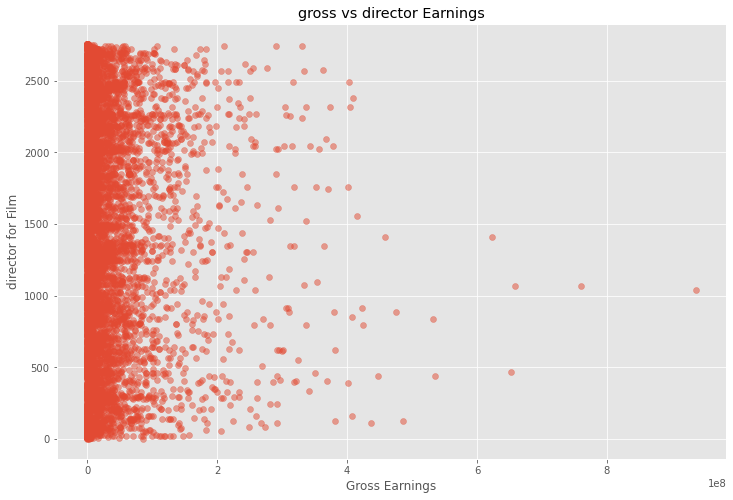

In [46]:
#building correlations
#gross vs director beacuse i think the director is the most important indicator if the movie will have a high grossing amount
#didnt work becuase director is a string. it looks dirty


plt.scatter(x=df['gross'], y=df['director'], alpha=0.5)
plt.title('gross vs director Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('director for Film')
plt.show()

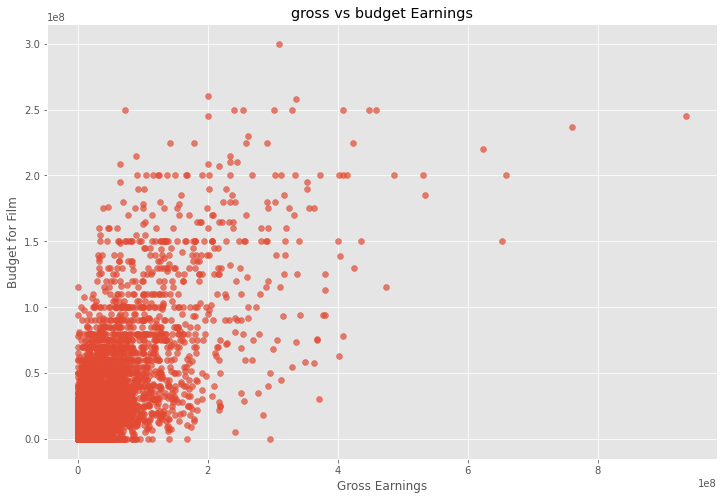

In [47]:
#change y axis to something else
plt.scatter(x=df['gross'], y=df['budget'], alpha=0.7)
plt.title('gross vs budget Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [48]:
df.sort_values(by = ['gross'],ascending = False).head()

,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
6380,245000000,936662225,382.311112,4679,1428,2290,2015,1037,475,2356,0,7,8.1,687192,136,54
5061,237000000,760507625,320.889293,501,2062,1800,2009,1066,2084,1629,0,7,7.8,954412,162,53
2420,200000000,658672302,329.336151,6177,2062,910,1997,1066,1444,1629,6,7,7.8,862554,194,54
6391,150000000,652270625,434.847083,2721,2085,2247,2015,466,404,3310,0,7,7.0,469200,124,54
5723,220000000,623357910,283.344505,4995,1491,1987,2012,1412,2001,2145,0,7,8.1,1064633,143,54


In [49]:
#using seaborn for line

sns.regplot(x='gross', y='budget', data=df

SyntaxError: unexpected EOF while parsing (<ipython-input-49-6939884de935>, line 3)

<AxesSubplot:xlabel='gross', ylabel='budget'>

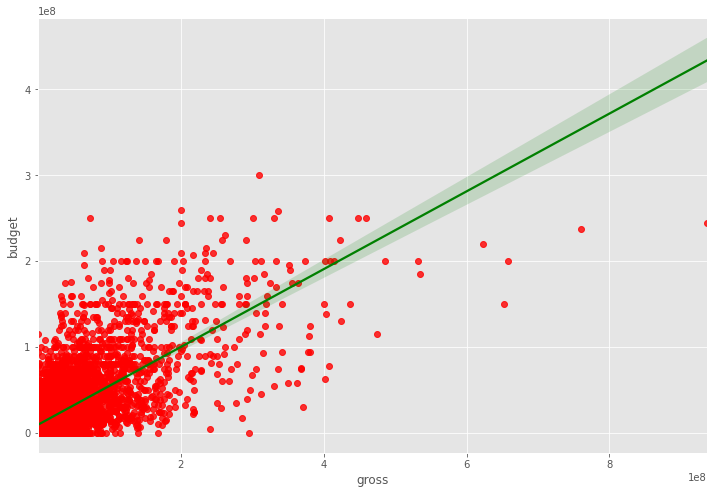

In [17]:
sns.regplot(x='gross', y='budget', data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [19]:
df.corr()

,budget,gross,Incomepercent,year,score,votes,runtime
budget,1.000000,0.712196,-0.023540,0.291009,0.042145,0.503924,0.268226
gross,0.712196,1.000000,0.023437,0.191548,0.165693,0.662457,0.224579
Incomepercent,-0.023540,0.023437,1.000000,0.002759,0.003194,0.015162,-0.028540
year,0.291009,0.191548,0.002759,1.000000,0.105276,0.229304,0.087639
score,0.042145,0.165693,0.003194,0.105276,1.000000,0.393607,0.395343
votes,0.503924,0.662457,0.015162,0.229304,0.393607,1.000000,0.317399
runtime,0.268226,0.224579,-0.028540,0.087639,0.395343,0.317399,1.000000


In [20]:
#assigning random numbers to each unique value to get correlation values

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()


,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
0,8000000,52287414,653.592675,4661,665,39,1986,2192,2454,3716,1,8,8.1,299174,89,54
1,6000000,70136369,1168.939483,1821,1680,27,1986,1296,1605,1970,4,7,7.8,264740,103,54
2,15000000,179800601,1198.670673,6203,1680,23,1986,2645,2345,1852,0,6,6.9,236909,110,54
3,18500000,85160248,460.325665,295,2062,33,1986,1066,2192,1629,0,8,8.4,540152,137,54
4,9000000,18564613,206.273478,1872,2122,36,1986,2123,1139,2549,1,6,6.9,36636,90,54


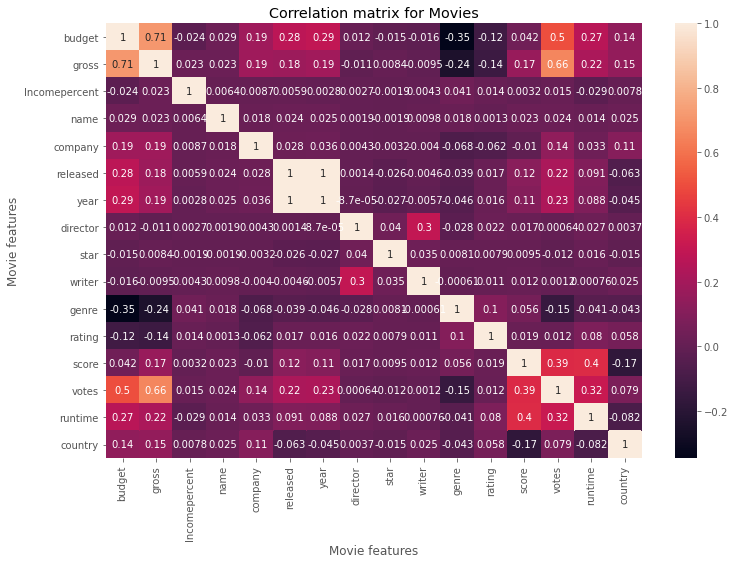

In [21]:
#correlation matrix creation the lighter the color the more correlation it has. 
# only correlation to having a higher gross earning is budget and votes. one of which is an arbitrary indicator
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:
df.columns

Index(['budget', 'gross', 'Incomepercent', 'name', 'company', 'released',
       'year', 'director', 'star', 'writer', 'genre', 'rating', 'score',
       'votes', 'runtime', 'country'],
      dtype='object')

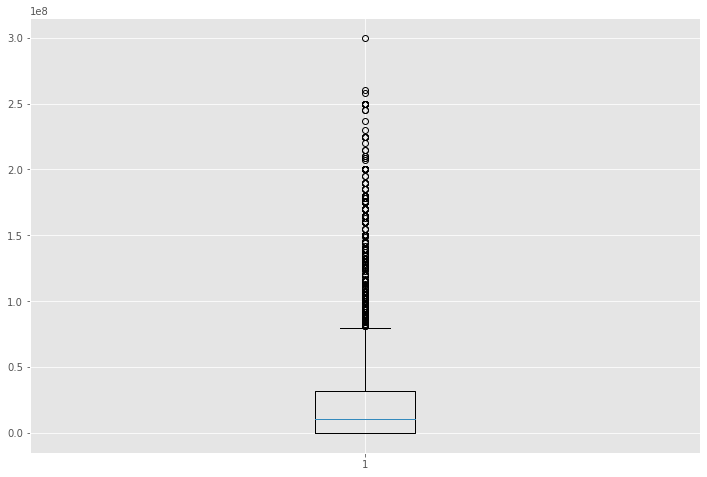

In [28]:
plt.boxplot(df.budget)
plt.show()

In [50]:
#=creating dataframe for top 20 budgets

dftop = df.sort_values(by = ['gross'],ascending = False).head(20)

dftop

,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
6380,245000000,936662225,382.311112,4679,1428,2290,2015,1037,475,2356,0,7,8.1,687192,136,54
5061,237000000,760507625,320.889293,501,2062,1800,2009,1066,2084,1629,0,7,7.8,954412,162,53
2420,200000000,658672302,329.336151,6177,2062,910,1997,1066,1444,1629,6,7,7.8,862554,194,54
6391,150000000,652270625,434.847083,2721,2085,2247,2015,466,404,3310,0,7,7.0,469200,124,54
5723,220000000,623357910,283.344505,4995,1491,1987,2012,1412,2001,2145,0,7,8.1,1064633,143,54
4840,185000000,534858444,289.112672,5189,2123,1696,2008,440,408,2090,0,7,9.0,1839571,152,54
6614,200000000,532177324,266.088662,4206,1428,2363,2016,835,739,625,0,7,7.9,365473,133,54
6687,200000000,486295561,243.147781,1836,1720,2328,2016,128,678,201,2,6,7.4,173005,97,54
2870,115000000,474544677,412.647545,4675,1428,1012,1999,885,729,1334,0,6,6.5,584809,136,54
6398,250000000,459005868,183.602347,502,1491,2239,2015,1412,2001,2145,0,7,7.4,537832,141,54


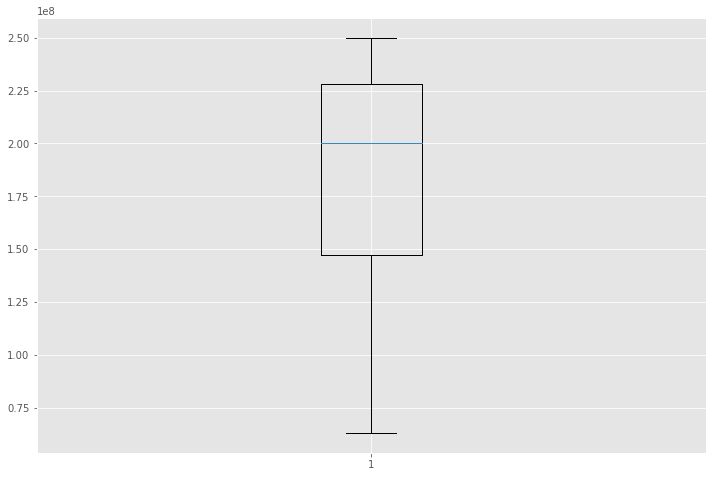

In [51]:
#seeing cat and whiskers for top 20  highest budget movies

plt.boxplot(dftop.budget)

plt.show()